# Library import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

#XGBoost
import xgboost as xgb
from xgboost import plot_importance

#SVM
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

# basic NN
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier


# Upsampling
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler

# Data preprocess

In [2]:
df = pd.read_excel("C:/Users/flori/OneDrive/Máy tính/do_an_thu_ha/new_data.xlsx", sheet_name='Sheet1')

In [3]:
df.describe()

,Date,Total Current Assets,Year,PPE Total Gross,PPE Total Net,Total Current Liabilities,SGAE,Net Income,Avg Net Trade Cycle (Days),Asset Turnover,...,Depreciation,Revenue,Long Term Investments,Intangibles,Net Income After Taxes,BVPSTotalEquity,Total Debt,Normalized Income After Taxes,Date Became Public,Organization Founded Year
count,2832,2.832000e+03,2832.000000,2.832000e+03,2.832000e+03,2.832000e+03,2.832000e+03,2.832000e+03,2.832000e+03,2832.000000,...,2.832000e+03,2.832000e+03,2.832000e+03,2.528000e+03,2.832000e+03,2808.000000,2.827000e+03,2.831000e+03,2832,2832.000000
mean,2018-12-17 20:27:27.457627136,3.520820e+12,2017.977048,2.991400e+12,2.105519e+12,2.596786e+12,4.081810e+11,3.747933e+11,2.620112e+03,1.148932,...,1.822028e+11,4.723688e+12,6.309198e+11,1.495681e+11,3.938011e+11,15244.187492,1.242394e+12,2.433900e+11,2011-10-01 21:14:44.745762560,2001.626766
min,2012-12-31 00:00:00,1.060151e+10,2012.000000,0.000000e+00,0.000000e+00,1.545590e+08,-1.113534e+12,-1.290712e+13,-1.488362e+04,0.001083,...,-1.075282e+09,1.796862e+09,0.000000e+00,-1.049125e+10,-1.327899e+13,-9802.471892,0.000000e+00,-1.334344e+13,2000-07-28 00:00:00,1975.000000
25%,2016-12-31 00:00:00,2.986499e+11,2016.000000,8.948060e+10,5.171180e+10,1.528380e+11,2.824537e+10,1.445334e+10,5.769586e+01,0.431276,...,6.908166e+09,3.945306e+11,1.000000e+10,7.881599e+08,1.475479e+10,10233.244288,1.079660e+10,7.584095e+09,2008-01-22 12:00:00,1997.750000
50%,2018-12-31 00:00:00,7.887165e+11,2018.000000,3.608626e+11,1.991031e+11,5.190537e+11,7.780442e+10,4.925333e+10,1.229038e+02,0.848406,...,2.383431e+10,1.064063e+12,5.075160e+10,1.062794e+10,5.181329e+10,12855.267350,1.129433e+11,2.894274e+10,2010-03-23 00:00:00,2003.000000
75%,2020-12-31 00:00:00,2.353745e+12,2020.000000,1.276490e+12,7.910994e+11,1.601611e+12,2.308483e+11,1.831017e+11,2.320801e+02,1.448982,...,8.192962e+10,3.167438e+12,2.063254e+11,5.037235e+10,1.930534e+11,17303.575022,6.170527e+11,1.033541e+11,2015-11-05 00:00:00,2007.000000
max,2022-12-31 00:00:00,2.831167e+14,2022.000000,2.363684e+14,2.070527e+14,2.984115e+14,2.387822e+13,3.882456e+13,3.433327e+06,15.176504,...,2.128407e+13,3.040638e+14,4.945245e+13,2.462852e+13,3.894848e+13,541515.488863,6.486890e+13,3.934350e+13,2023-11-09 00:00:00,2017.000000
std,NaN,1.211978e+13,2.764481,1.180160e+13,9.344340e+12,1.096268e+13,1.587472e+12,1.774613e+12,7.869829e+04,1.177395,...,7.485904e+11,1.495545e+13,2.899910e+12,1.058522e+12,1.827622e+12,18285.445177,4.594647e+12,1.515856e+12,NaN,7.101537


In [4]:
df.head()

,Company,Date,Total Current Assets,Year,PPE Total Gross,PPE Total Net,Total Current Liabilities,SGAE,Net Income,Avg Net Trade Cycle (Days),...,Intangibles,Net Income After Taxes,BVPSTotalEquity,Total Debt,Normalized Income After Taxes,Company Common Name,Exchange Name,TRBC Industry Name,Date Became Public,Organization Founded Year
0,POM.HM,2013-12-31,3959029499670,2013,4887240391770,3274346376730,3820969092980,138621600960,-193307320820,140.817493,...,8.670387e+09,-194006135640,8578.583098,1.615223e+12,1.259648e+11,Pomina Steel Corp,HOCHIMINH STOCK EXCHANGE,Iron & Steel,2010-04-20,1999
1,POM.HM,2014-12-31,6151052752300,2014,5016521177670,3082378424600,6234964380060,143962464190,-28709332690,151.083830,...,7.988258e+09,-28515505710,8400.256470,1.755223e+12,1.259648e+11,Pomina Steel Corp,HOCHIMINH STOCK EXCHANGE,Iron & Steel,2010-04-20,1999
2,POM.HM,2015-12-31,4234739302840,2015,5036887398830,2782943054910,4184301817070,116720931020,27487497250,181.504223,...,7.215862e+09,27819524280,8498.939643,1.615223e+12,2.061786e+11,Pomina Steel Corp,HOCHIMINH STOCK EXCHANGE,Iron & Steel,2010-04-20,1999
3,POM.HM,2016-12-31,4441539818360,2016,4972855193800,2457850761440,4061173119280,108139758750,301093672940,156.934652,...,5.626082e+09,301604888040,9579.899427,1.445223e+12,3.181123e+11,Pomina Steel Corp,HOCHIMINH STOCK EXCHANGE,Iron & Steel,2010-04-20,1999
4,POM.HM,2017-12-31,5153756368800,2017,5024548736760,2284073293150,4173898154890,137094769850,696233669230,132.293106,...,4.036303e+09,697702935150,12079.455758,1.281423e+12,2.577748e+11,Pomina Steel Corp,HOCHIMINH STOCK EXCHANGE,Iron & Steel,2010-04-20,1999


In [5]:
df = df.drop(columns=['Date', 'Company Common Name', 'Exchange Name', 'Date Became Public', 'Organization Founded Year'])
df.head()

,Company,Total Current Assets,Year,PPE Total Gross,PPE Total Net,Total Current Liabilities,SGAE,Net Income,Avg Net Trade Cycle (Days),Asset Turnover,...,"WC/Sales, Period-Period Diff",Depreciation,Revenue,Long Term Investments,Intangibles,Net Income After Taxes,BVPSTotalEquity,Total Debt,Normalized Income After Taxes,TRBC Industry Name
0,POM.HM,3959029499670,2013,4887240391770,3274346376730,3820969092980,138621600960,-193307320820,140.817493,1.213669,...,-2.001508,320035834910,9891226461080,9402985380,8.670387e+09,-194006135640,8578.583098,1.615223e+12,1.259648e+11,Iron & Steel
1,POM.HM,6151052752300,2014,5016521177670,3082378424600,6234964380060,143962464190,-28709332690,151.083830,1.281408,...,-1.263329,322625839870,10804878879950,11402985380,7.988258e+09,-28515505710,8400.256470,1.755223e+12,1.259648e+11,Iron & Steel
2,POM.HM,4234739302840,2015,5036887398830,2782943054910,4184301817070,116720931020,27487497250,181.504223,1.189290,...,-0.421230,323041991260,9807578644920,11402985380,7.215862e+09,27819524280,8498.939643,1.615223e+12,2.061786e+11,Iron & Steel
3,POM.HM,4441539818360,2016,4972855193800,2457850761440,4061173119280,108139758750,301093672940,156.934652,1.311893,...,2.487572,262956171150,9296925643430,11402985380,5.626082e+09,301604888040,9579.899427,1.445223e+12,3.181123e+11,Iron & Steel
4,POM.HM,5153756368800,2017,5024548736760,2284073293150,4173898154890,137094769850,696233669230,132.293106,1.545539,...,3.664946,240966710580,11369574627890,51500648890,4.036303e+09,697702935150,12079.455758,1.281423e+12,2.577748e+11,Iron & Steel


In [6]:
distinct_companies = df['Company'].unique()
num_distinct_companies = len(distinct_companies)
print("Number of distinct values in the 'company' column:", num_distinct_companies)

for company in distinct_companies:
    print(company)

print("\nTotal distinct companies:", num_distinct_companies)

Number of distinct values in the 'company' column: 385
POM.HM
V21.HN
LIG.HN
TDC.HM
NVT.HM
VCM.HN
SPM.HM
DTL.HM
GDW.HN
PDN.HM
CMV.HM
BCE.HM
NHA.HM
AAA.HM
LDP.HN
DRH.HM
VRC.HM
HMH.HN
PDR.HM
PCT.HN
QCG.HM
SMB.HM
NET.HN
PTL.HM
OCH.HN
HAT.HN
TIG.HN
HQC.HM
TDW.HM
ARM.HN
KTT.HN
SCR.HM
CMX.HM
CMS.HN
EVE.HM
HTI.HM
BSC.HN
PPS.HN
HTL.HM
CLW.HM
MDG.HM
PTD.HN
NKG.HM
D11.HN
JVC.HM
PTB.HM
THG.HM
SVN.HN
SVT.HM
CNG.HM
BRC.HM
HHS.HM
LAS.HN
GAS.HM
DHM.HM
FCN.HM
SLS.HN
AGM.HM
HAR.HM
SHA.HM
NLG.HM
FCM.HM
PSD.HN
THS.HN
SCI.HN
CLL.HM
SKG.HM
MWG.HM
DGC.HM
TVC.HN
PEN.HN
CEO.HN
HVN.HM
QBS.HM
SFG.HM
CAV.HM
NCT.HM
VTJ.HN
HAH.HM
SGR.HM
FID.HN
PSW.HN
HNG.HM
BCG.HM
DGW.HM
PDB.HN
LDG.HM
VPS.HM
BFC.HM
CCR.HN
STK.HM
NAF.HM
DAT.HM
VGC.HM
VMS.HN
GEX.HM
MBG.HN
TFC.HN
HHV.HM
VSA.HN
TEG.HM
NAP.HN
KPF.HM
PPY.HN
CDN.HN
TDM.HM
CLM.HN
MST.HN
TIP.HM
HCD.HM
ADS.HM
HID.HM
CTP.HN
KSV.HN
DAH.HM
TCH.HM
MVB.HN
TTH.HN
BHN.HM
PC1.HM
SAB.HM
DTK.HN
NVL.HM
VIF.HN
DPG.HM
HKT.HN
DBD.HM
PIA.HN
VJC.HM
BAX.HN
GEG.HM
PLX.HM
C69.HN
SBV.HM
TCD.HM


In [7]:
company_frequency = df['Company'].value_counts()

print("Amount of samples of each company column:")
print(company_frequency)

Amount of samples of each company column:
Company
FCN.HM    11
CTD.HM    11
POM.HM    10
VIC.HM    10
VIP.HM    10
          ..
TVC.HN     1
BCC.HN     1
CRE.HM     1
BAF.HM     1
PSW.HN     1
Name: count, Length: 385, dtype: int64


In [8]:
industry_frequency = df['TRBC Industry Name'].value_counts()

print("Amount of companies in each industry:")
print(industry_frequency)

Amount of companies in each industry:
TRBC Industry Name
Real Estate Rental, Development & Operations    382
Construction & Engineering                      343
Food Processing                                 172
Oil & Gas Refining and Marketing                122
Iron & Steel                                    119
                                               ... 
Leisure & Recreation                              2
Specialty Chemicals                               2
Industrial Machinery & Equipment                  2
Natural Gas Utilities                             1
Healthcare Facilities & Services                  1
Name: count, Length: 79, dtype: int64


In [9]:
# compute the percentage of missing values in each row
percent_missing = df.isna().sum(axis=1) / len(df.columns)

# compute the average percentage of missing values across all rows
avg_percent_missing = percent_missing.mean()

# print the results
print(f"Percentage of rows with missing values: {avg_percent_missing:.2%}")

Percentage of rows with missing values: 0.35%


<Axes: >

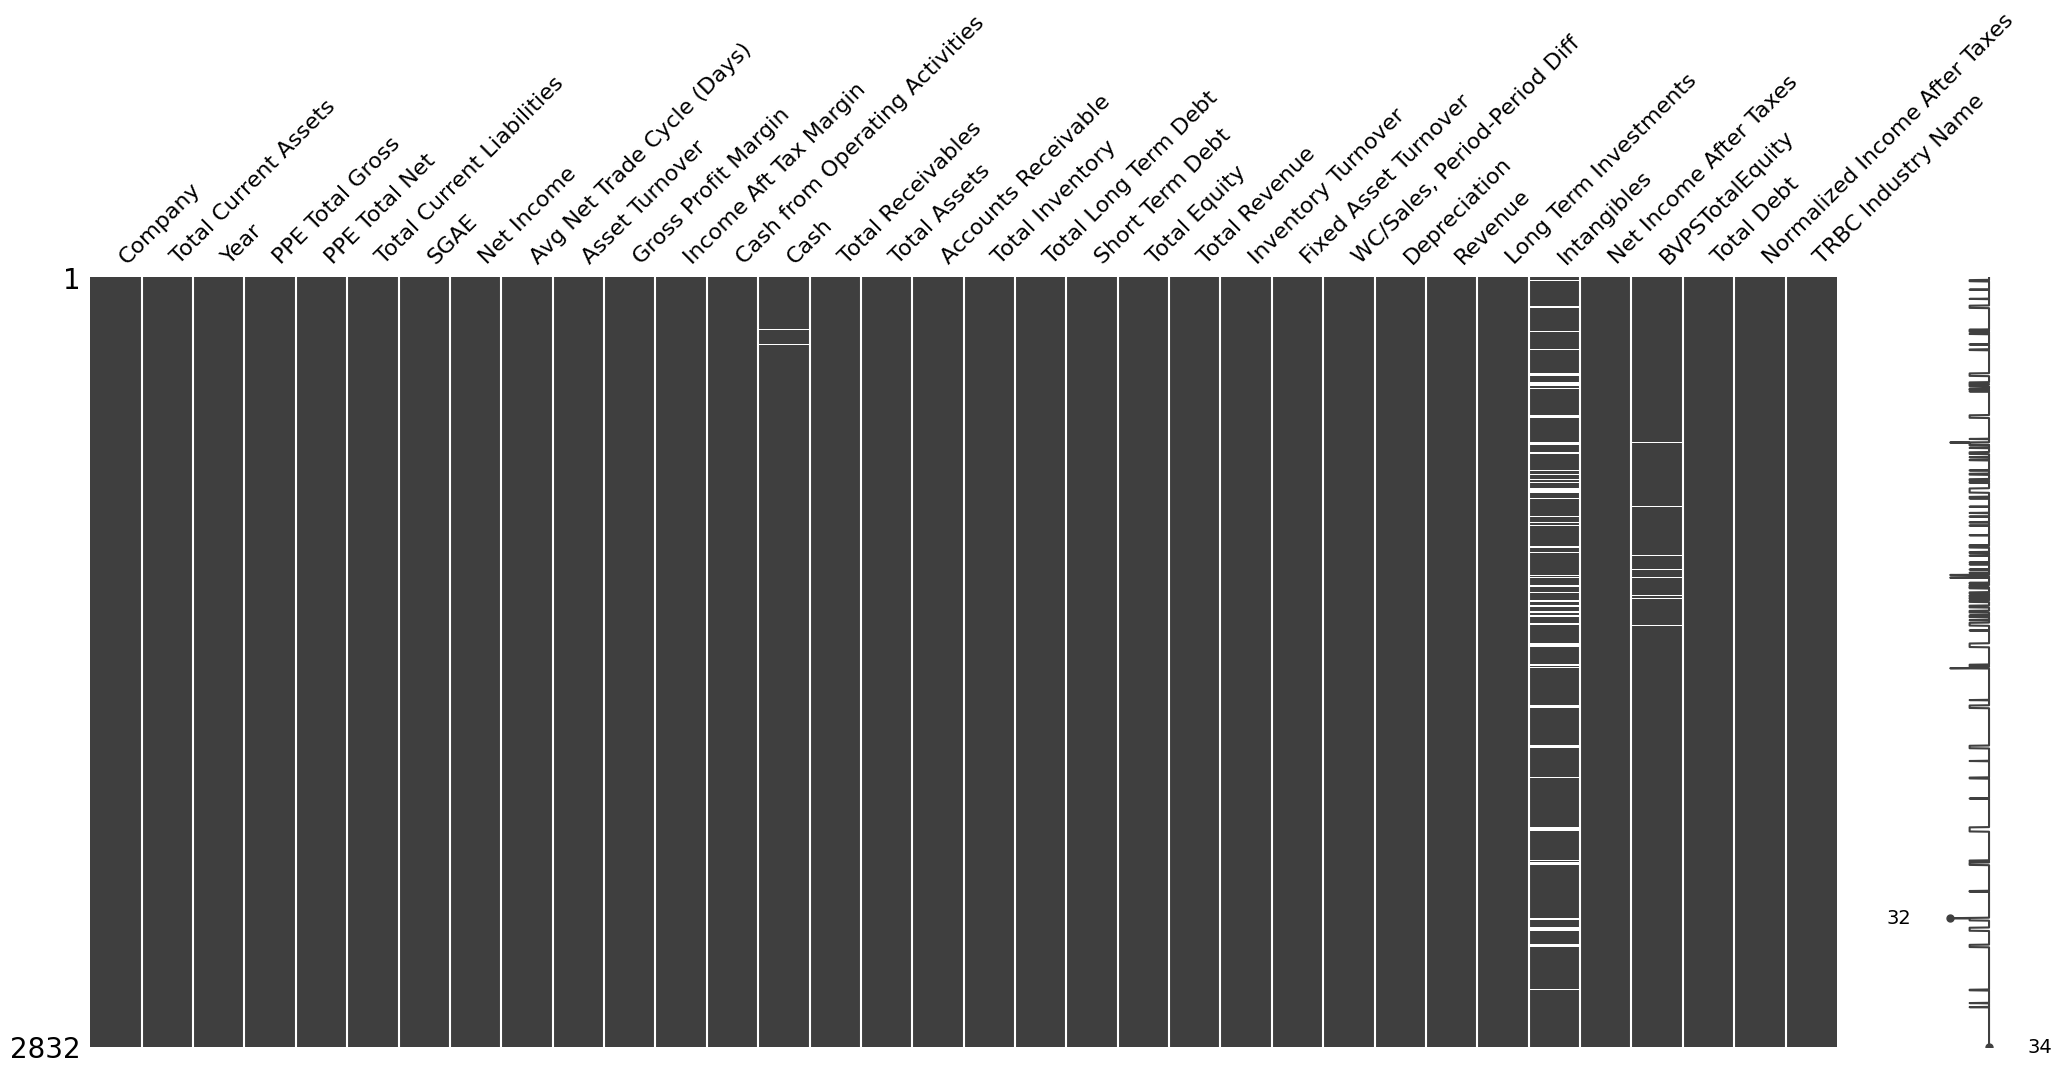

In [10]:
# create a matrix plot of missing values
msno.matrix(df)

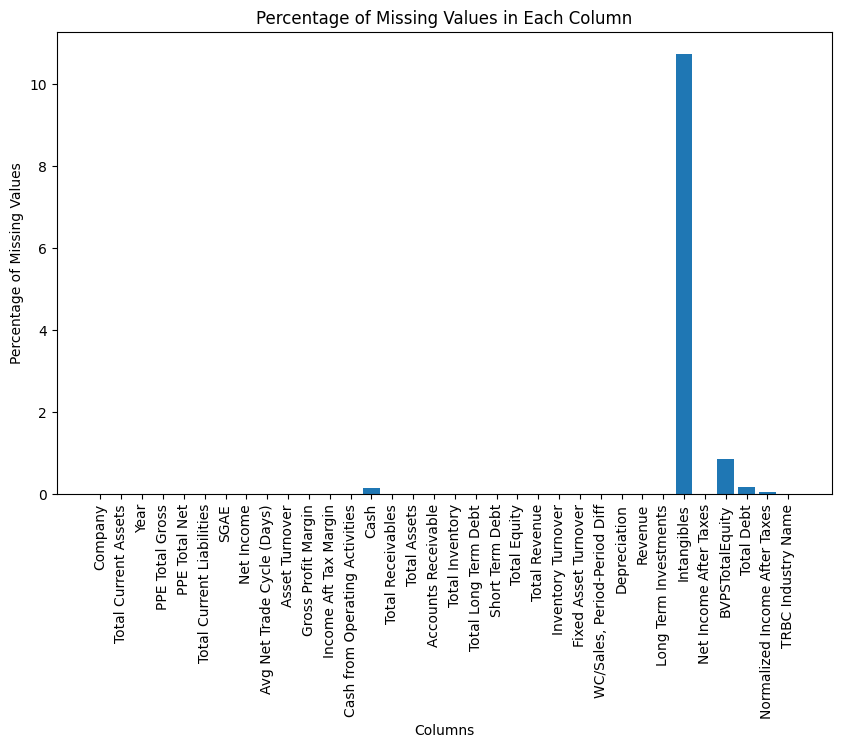

In [11]:
percent_missing = df.isna().sum() / len(df) * 100

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(percent_missing.index, percent_missing)
plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=90)
plt.show()

**Fill NULL**

In [12]:
# Replace NULL values in the "Cash" column with the mean value
mean_cash = df['Cash'].mean()
df['Cash'].fillna(mean_cash, inplace=True)

C:\Users\flori\AppData\Local\Temp\ipykernel_14736\4218664205.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cash'].fillna(mean_cash, inplace=True)


In [13]:
mean_Intangibles = df['Intangibles'].mean()
df['Intangibles'].fillna(mean_Intangibles, inplace= True)

C:\Users\flori\AppData\Local\Temp\ipykernel_14736\1545108025.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Intangibles'].fillna(mean_Intangibles, inplace= True)


In [14]:
mean_BVPSTotalEquity = df['BVPSTotalEquity'].mean()
df['BVPSTotalEquity'].fillna(mean_BVPSTotalEquity, inplace= True)

C:\Users\flori\AppData\Local\Temp\ipykernel_14736\239101397.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BVPSTotalEquity'].fillna(mean_BVPSTotalEquity, inplace= True)


<Axes: >

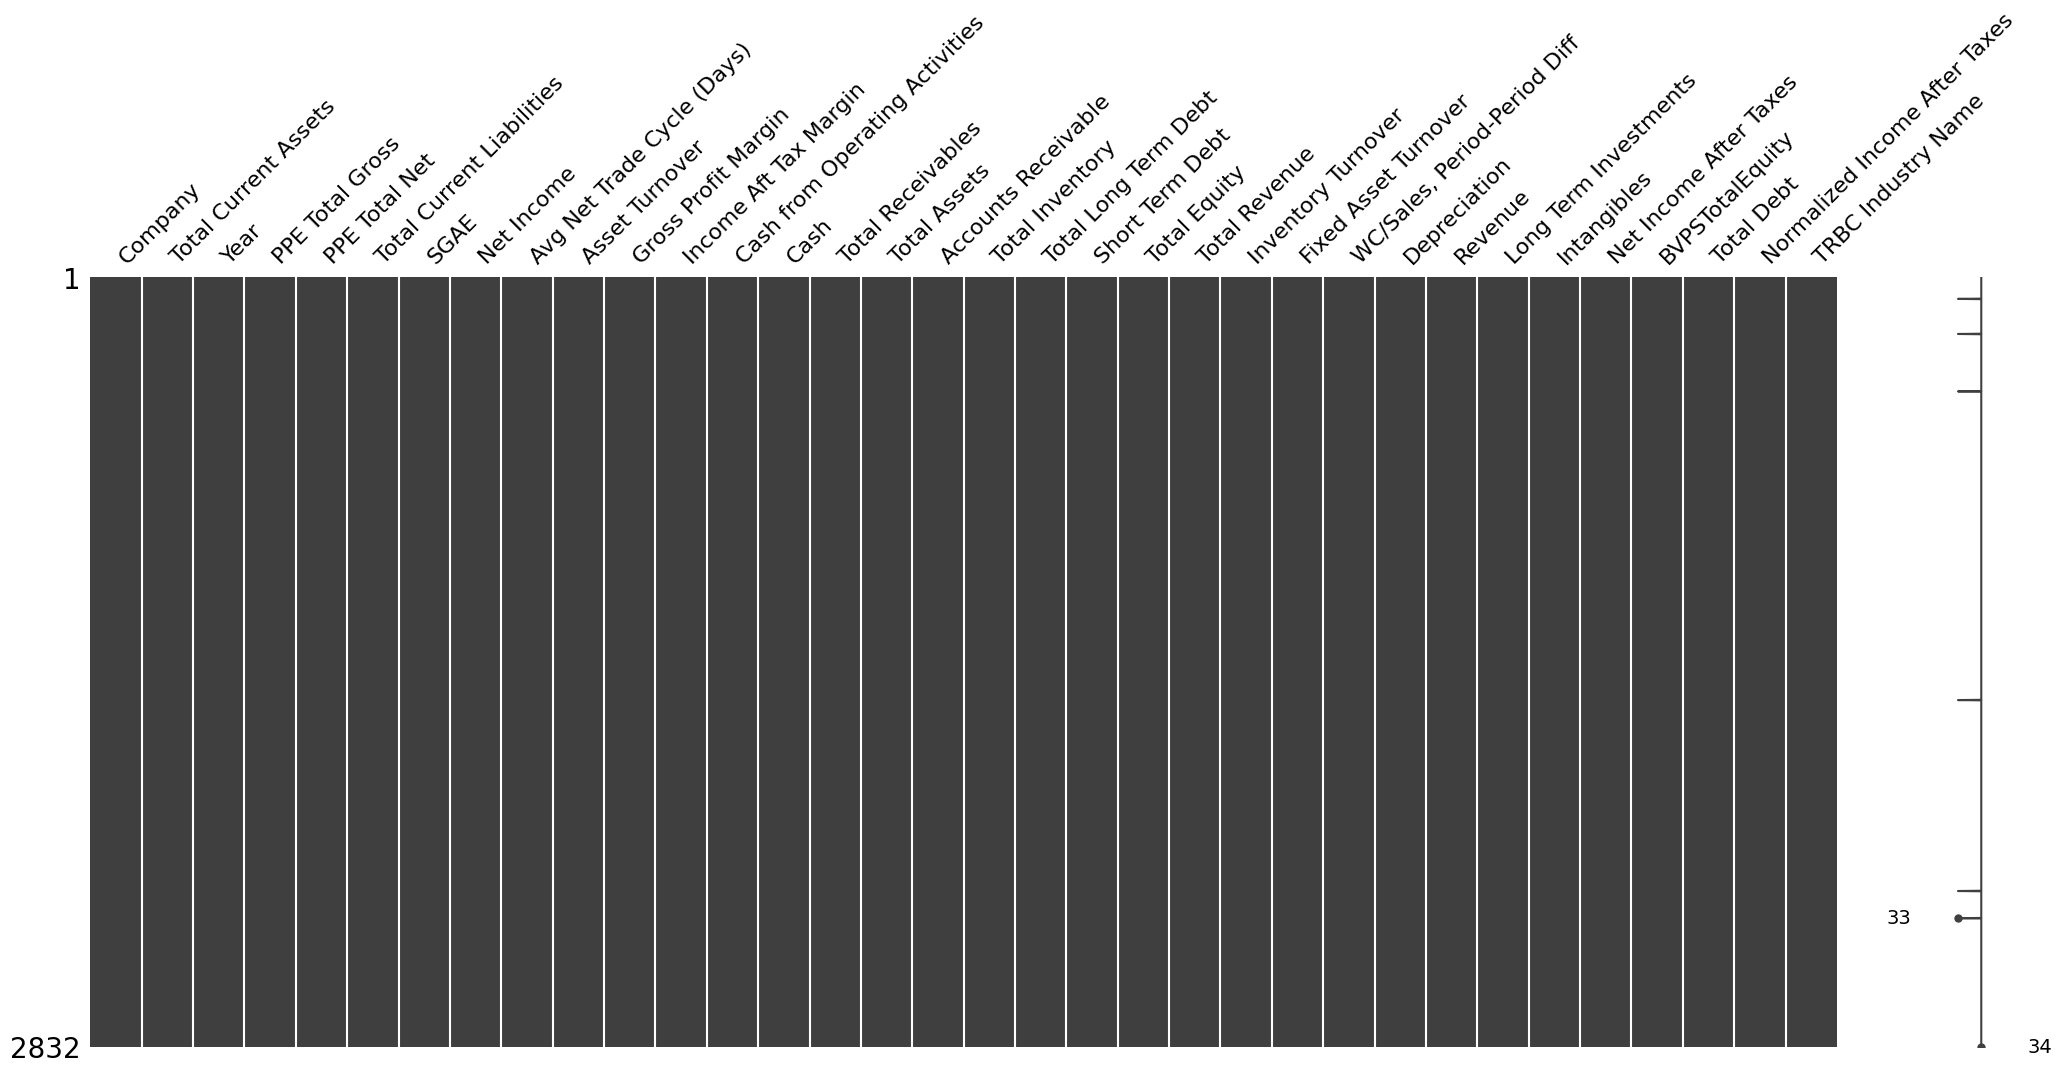

In [15]:
msno.matrix(df)

# Calculate F-Score

F–score = –7.893 + (0.790 x RSST) + (2.518 x ΔREC) + (1.191 x ΔINV) + (1.979 x SOFTASSETS) + (0.171 x ΔCASHSALES) – (0.932 x ΔROA) + (1.029 * ISSUE)

RSST = ∆WC + ∆NCO + ∆FIN  ⁄ Average total assets

WC = [Total Current Assets – Cash] – [Total Current Liabilities] 

Estimated NCO = (Total Assets - Current Assets) - (Total Liabilities - Current Liabilities - Long Term Debt)

FIN=[Long-term Investments]–[Long-term Debt + Short term Debt] 

ΔREC = ∆ Accounts Receivable  ÷ Average total assets 

ΔINV =  Total Inventory ÷ Average total assets

SOFTASSETS =  [Total Assets – PPE – Cash] ÷ Total Assets 

ΔCASHSALES = [Revenue – ∆ Accounts Receivable]

ΔROA = (Normalized Income After Taxes năm sau / Total Assets tại năm sau) - (Normalized Income After Taxes năm trước / Total Assets năm trước)

ISSUE= 1




In [16]:
# Filter out companies with data for only one year
company_counts = df['Company'].value_counts()
companies_with_multiple_years = company_counts[company_counts > 1].index
df_filtered = df[df['Company'].isin(companies_with_multiple_years)]

# Calculate financial ratios and metrics

df_filtered['WC'] = (df_filtered['Total Current Assets'] - df_filtered['Cash']) - df_filtered['Total Current Liabilities']

df_filtered['NOC'] = ((df_filtered['Total Assets'] - df_filtered['Total Current Assets']) -
                      (df_filtered['Total Debt'] - df_filtered['Total Current Liabilities'] - df_filtered['Total Long Term Debt']))

df_filtered['FIN'] = (df_filtered['Long Term Investments'] - 
                      (df_filtered['Total Long Term Debt'] + df_filtered['Short Term Debt']))

df_filtered['RSST'] = ((df_filtered['WC'] - df_filtered['WC'].shift(1)) + 
                       (df_filtered['NOC'] - df_filtered['NOC'].shift(1)) + 
                       (df_filtered['FIN'] - df_filtered['FIN'].shift(1))) / (df_filtered['Total Assets'].rolling(2).mean())

df_filtered['REC'] = (df_filtered['Accounts Receivable'] - df_filtered['Accounts Receivable'].shift(1)) / df_filtered['Total Assets'].rolling(2).mean()

df_filtered['INV'] = df_filtered['Total Inventory'] / df_filtered['Total Assets'].rolling(2).mean()

df_filtered['SOFTASSETS'] = (df_filtered['Total Assets'] - df_filtered['PPE Total Gross'] - df_filtered['PPE Total Net'] - df_filtered['Cash']) / df_filtered['Total Assets']

df_filtered['CASHSALES'] = df_filtered['Revenue'] - (df_filtered['Accounts Receivable'] - df_filtered['Accounts Receivable'].shift(1))

df_filtered['ROA'] = ((df_filtered['Net Income After Taxes'] / df_filtered['Total Assets']) - 
                      (df_filtered['Net Income After Taxes'].shift(1) / df_filtered['Total Assets'].shift(1)))


df = pd.merge(df, df_filtered[['Company', 'Year', 'WC', 'NOC', 'FIN', 'RSST', 'REC', 'INV', 'SOFTASSETS', 'CASHSALES', 'ROA']], on=['Company', 'Year'], how='left')

C:\Users\flori\AppData\Local\Temp\ipykernel_14736\2047747263.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['WC'] = (df_filtered['Total Current Assets'] - df_filtered['Cash']) - df_filtered['Total Current Liabilities']
C:\Users\flori\AppData\Local\Temp\ipykernel_14736\2047747263.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['NOC'] = ((df_filtered['Total Assets'] - df_filtered['Total Current Assets']) -
C:\Users\flori\AppData\Local\Temp\ipykernel_14736\2047747263.py:13: Se

In [17]:
df

,Company,Total Current Assets,Year,PPE Total Gross,PPE Total Net,Total Current Liabilities,SGAE,Net Income,Avg Net Trade Cycle (Days),Asset Turnover,...,TRBC Industry Name,WC,NOC,FIN,RSST,REC,INV,SOFTASSETS,CASHSALES,ROA
0,POM.HM,3959029499670,2013,4887240391770,3274346376730,3820969092980,138621600960,-193307320820,140.817493,1.213669,...,Iron & Steel,6.981206e+10,7.019763e+12,-4.341391e+12,NaN,NaN,NaN,-0.098154,NaN,NaN
1,POM.HM,6151052752300,2014,5016521177670,3082378424600,6234964380060,143962464190,-28709332690,151.083830,1.281408,...,Iron & Steel,-1.909439e+11,8.487526e+12,-6.091334e+12,-0.064390,0.057973,0.432056,0.124217,1.031605e+13,0.022844
2,POM.HM,4234739302840,2015,5036887398830,2782943054910,4184301817070,116720931020,27487497250,181.504223,1.189290,...,Iron & Steel,2.866054e+10,6.024071e+12,-4.171790e+12,-0.039326,-0.016463,0.263822,-0.100834,9.943345e+12,0.006949
3,POM.HM,4441539818360,2016,4972855193800,2457850761440,4061173119280,108139758750,301093672940,156.934652,1.311893,...,Iron & Steel,1.406825e+11,5.538932e+12,-3.756330e+12,0.005975,0.062906,0.230710,-0.088004,8.851130e+12,0.038876
4,POM.HM,5153756368800,2017,5024548736760,2284073293150,4173898154890,137094769850,696233669230,132.293106,1.545539,...,Iron & Steel,8.216939e+11,5.518467e+12,-3.550748e+12,0.117739,-0.032919,0.265009,0.025579,1.161174e+13,0.048270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,IJC.HM,6277386822630,2018,913184235150,996267060790,5453087490130,90013362040,232986396510,1466.200013,0.154087,...,"Real Estate Rental, Development & Operations",7.368285e+11,5.378233e+12,-3.304034e+11,-0.241243,0.028617,0.632088,0.754623,1.014418e+12,0.005492
2912,IJC.HM,5803347902020,2019,945696166750,958787634060,5036127643530,103847512720,303682334250,1059.541451,0.203637,...,"Real Estate Rental, Development & Operations",7.173149e+11,4.663089e+12,-2.333452e+11,-0.081158,-0.009182,0.610715,0.741970,1.671953e+12,0.011465
2913,IJC.HM,4886515196140,2020,1000511746900,904243595020,2023962474680,87958968700,369903449900,842.573282,0.297081,...,"Real Estate Rental, Development & Operations",2.721616e+12,4.040865e+11,-3.459637e+11,-0.328440,-0.032974,0.471857,0.700979,2.378967e+12,0.013975
2914,IJC.HM,4808121360240,2021,1014197507820,898556414440,1939958357220,107785872340,621100240970,784.998222,0.381206,...,"Real Estate Rental, Development & Operations",2.804285e+12,6.743951e+11,-5.849386e+11,0.016704,-0.017837,0.589922,0.709688,2.723459e+12,0.037153


In [18]:
columns_to_check = ['WC', 'NOC', 'FIN', 'RSST', 'REC', 'INV', 'SOFTASSETS', 'CASHSALES', 'ROA']
df.dropna(subset=columns_to_check, inplace=True)

In [19]:
df['ISSUE'] = 1

In [20]:
df['F-Score'] = (
    -7.893 + 
    (0.790 * df['RSST']) +
    (2.518 * df['REC']) +
    (1.191 * df['INV']) +
    (1.979 * df['SOFTASSETS']) +
    (0.171 * df['CASHSALES']) +
    (-0.932 * df['ROA']) +
    (1.029 * df['ISSUE'])
)

In [21]:
# Drop samples with NaN F-Score
df.dropna(subset=['F-Score'], inplace=True)

df

,Company,Total Current Assets,Year,PPE Total Gross,PPE Total Net,Total Current Liabilities,SGAE,Net Income,Avg Net Trade Cycle (Days),Asset Turnover,...,NOC,FIN,RSST,REC,INV,SOFTASSETS,CASHSALES,ROA,ISSUE,F-Score
1,POM.HM,6151052752300,2014,5016521177670,3082378424600,6234964380060,143962464190,-28709332690,151.083830,1.281408,...,8.487526e+12,-6.091334e+12,-0.064390,0.057973,0.432056,0.124217,1.031605e+13,0.022844,1,1.764045e+12
2,POM.HM,4234739302840,2015,5036887398830,2782943054910,4184301817070,116720931020,27487497250,181.504223,1.189290,...,6.024071e+12,-4.171790e+12,-0.039326,-0.016463,0.263822,-0.100834,9.943345e+12,0.006949,1,1.700312e+12
3,POM.HM,4441539818360,2016,4972855193800,2457850761440,4061173119280,108139758750,301093672940,156.934652,1.311893,...,5.538932e+12,-3.756330e+12,0.005975,0.062906,0.230710,-0.088004,8.851130e+12,0.038876,1,1.513543e+12
4,POM.HM,5153756368800,2017,5024548736760,2284073293150,4173898154890,137094769850,696233669230,132.293106,1.545539,...,5.518467e+12,-3.550748e+12,0.117739,-0.032919,0.265009,0.025579,1.161174e+13,0.048270,1,1.985608e+12
5,POM.HM,6674496825660,2018,7111488602150,4159666395970,6362523209620,124212477820,432295832110,132.071565,1.442634,...,1.041783e+13,-6.039054e+12,0.188322,0.042535,0.293059,-0.036954,1.307025e+13,-0.051656,1,2.235013e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,IJC.HM,6277386822630,2018,913184235150,996267060790,5453087490130,90013362040,232986396510,1466.200013,0.154087,...,5.378233e+12,-3.304034e+11,-0.241243,0.028617,0.632088,0.754623,1.014418e+12,0.005492,1,1.734654e+11
2912,IJC.HM,5803347902020,2019,945696166750,958787634060,5036127643530,103847512720,303682334250,1059.541451,0.203637,...,4.663089e+12,-2.333452e+11,-0.081158,-0.009182,0.610715,0.741970,1.671953e+12,0.011465,1,2.859040e+11
2913,IJC.HM,4886515196140,2020,1000511746900,904243595020,2023962474680,87958968700,369903449900,842.573282,0.297081,...,4.040865e+11,-3.459637e+11,-0.328440,-0.032974,0.471857,0.700979,2.378967e+12,0.013975,1,4.068034e+11
2914,IJC.HM,4808121360240,2021,1014197507820,898556414440,1939958357220,107785872340,621100240970,784.998222,0.381206,...,6.743951e+11,-5.849386e+11,0.016704,-0.017837,0.589922,0.709688,2.723459e+12,0.037153,1,4.657116e+11


In [22]:
used_df = df.copy()
used_df

,Company,Total Current Assets,Year,PPE Total Gross,PPE Total Net,Total Current Liabilities,SGAE,Net Income,Avg Net Trade Cycle (Days),Asset Turnover,...,NOC,FIN,RSST,REC,INV,SOFTASSETS,CASHSALES,ROA,ISSUE,F-Score
1,POM.HM,6151052752300,2014,5016521177670,3082378424600,6234964380060,143962464190,-28709332690,151.083830,1.281408,...,8.487526e+12,-6.091334e+12,-0.064390,0.057973,0.432056,0.124217,1.031605e+13,0.022844,1,1.764045e+12
2,POM.HM,4234739302840,2015,5036887398830,2782943054910,4184301817070,116720931020,27487497250,181.504223,1.189290,...,6.024071e+12,-4.171790e+12,-0.039326,-0.016463,0.263822,-0.100834,9.943345e+12,0.006949,1,1.700312e+12
3,POM.HM,4441539818360,2016,4972855193800,2457850761440,4061173119280,108139758750,301093672940,156.934652,1.311893,...,5.538932e+12,-3.756330e+12,0.005975,0.062906,0.230710,-0.088004,8.851130e+12,0.038876,1,1.513543e+12
4,POM.HM,5153756368800,2017,5024548736760,2284073293150,4173898154890,137094769850,696233669230,132.293106,1.545539,...,5.518467e+12,-3.550748e+12,0.117739,-0.032919,0.265009,0.025579,1.161174e+13,0.048270,1,1.985608e+12
5,POM.HM,6674496825660,2018,7111488602150,4159666395970,6362523209620,124212477820,432295832110,132.071565,1.442634,...,1.041783e+13,-6.039054e+12,0.188322,0.042535,0.293059,-0.036954,1.307025e+13,-0.051656,1,2.235013e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,IJC.HM,6277386822630,2018,913184235150,996267060790,5453087490130,90013362040,232986396510,1466.200013,0.154087,...,5.378233e+12,-3.304034e+11,-0.241243,0.028617,0.632088,0.754623,1.014418e+12,0.005492,1,1.734654e+11
2912,IJC.HM,5803347902020,2019,945696166750,958787634060,5036127643530,103847512720,303682334250,1059.541451,0.203637,...,4.663089e+12,-2.333452e+11,-0.081158,-0.009182,0.610715,0.741970,1.671953e+12,0.011465,1,2.859040e+11
2913,IJC.HM,4886515196140,2020,1000511746900,904243595020,2023962474680,87958968700,369903449900,842.573282,0.297081,...,4.040865e+11,-3.459637e+11,-0.328440,-0.032974,0.471857,0.700979,2.378967e+12,0.013975,1,4.068034e+11
2914,IJC.HM,4808121360240,2021,1014197507820,898556414440,1939958357220,107785872340,621100240970,784.998222,0.381206,...,6.743951e+11,-5.849386e+11,0.016704,-0.017837,0.589922,0.709688,2.723459e+12,0.037153,1,4.657116e+11


In [23]:
# Create a new column to categorize F-Score as "Low Possibility" or "Medium Possibility" or "High Possibility"
used_df['Status'] = used_df['F-Score'].apply(lambda x: "Low Possibility" if x < 1 else ("Medium Possibility" if x >= 1 and x < 2.45 else "High Possibility"))


In [24]:
used_df

,Company,Total Current Assets,Year,PPE Total Gross,PPE Total Net,Total Current Liabilities,SGAE,Net Income,Avg Net Trade Cycle (Days),Asset Turnover,...,FIN,RSST,REC,INV,SOFTASSETS,CASHSALES,ROA,ISSUE,F-Score,Status
1,POM.HM,6151052752300,2014,5016521177670,3082378424600,6234964380060,143962464190,-28709332690,151.083830,1.281408,...,-6.091334e+12,-0.064390,0.057973,0.432056,0.124217,1.031605e+13,0.022844,1,1.764045e+12,High Possibility
2,POM.HM,4234739302840,2015,5036887398830,2782943054910,4184301817070,116720931020,27487497250,181.504223,1.189290,...,-4.171790e+12,-0.039326,-0.016463,0.263822,-0.100834,9.943345e+12,0.006949,1,1.700312e+12,High Possibility
3,POM.HM,4441539818360,2016,4972855193800,2457850761440,4061173119280,108139758750,301093672940,156.934652,1.311893,...,-3.756330e+12,0.005975,0.062906,0.230710,-0.088004,8.851130e+12,0.038876,1,1.513543e+12,High Possibility
4,POM.HM,5153756368800,2017,5024548736760,2284073293150,4173898154890,137094769850,696233669230,132.293106,1.545539,...,-3.550748e+12,0.117739,-0.032919,0.265009,0.025579,1.161174e+13,0.048270,1,1.985608e+12,High Possibility
5,POM.HM,6674496825660,2018,7111488602150,4159666395970,6362523209620,124212477820,432295832110,132.071565,1.442634,...,-6.039054e+12,0.188322,0.042535,0.293059,-0.036954,1.307025e+13,-0.051656,1,2.235013e+12,High Possibility
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,IJC.HM,6277386822630,2018,913184235150,996267060790,5453087490130,90013362040,232986396510,1466.200013,0.154087,...,-3.304034e+11,-0.241243,0.028617,0.632088,0.754623,1.014418e+12,0.005492,1,1.734654e+11,High Possibility
2912,IJC.HM,5803347902020,2019,945696166750,958787634060,5036127643530,103847512720,303682334250,1059.541451,0.203637,...,-2.333452e+11,-0.081158,-0.009182,0.610715,0.741970,1.671953e+12,0.011465,1,2.859040e+11,High Possibility
2913,IJC.HM,4886515196140,2020,1000511746900,904243595020,2023962474680,87958968700,369903449900,842.573282,0.297081,...,-3.459637e+11,-0.328440,-0.032974,0.471857,0.700979,2.378967e+12,0.013975,1,4.068034e+11,High Possibility
2914,IJC.HM,4808121360240,2021,1014197507820,898556414440,1939958357220,107785872340,621100240970,784.998222,0.381206,...,-5.849386e+11,0.016704,-0.017837,0.589922,0.709688,2.723459e+12,0.037153,1,4.657116e+11,High Possibility


**Categories Distribution**

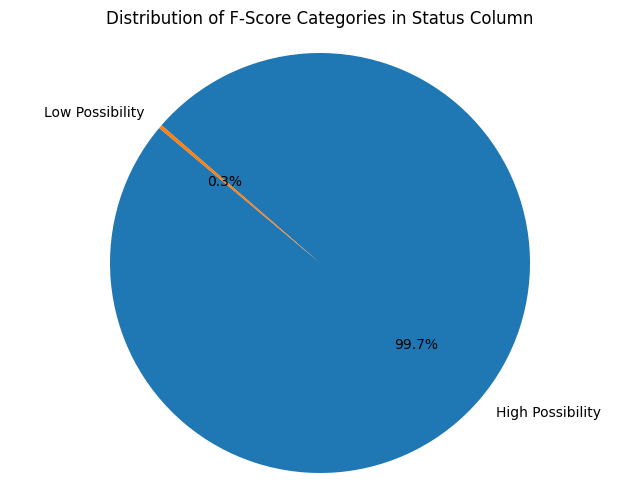

In [25]:
status_counts = used_df['Status'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of F-Score Categories in Status Column')
plt.axis('equal')
plt.show()

**=> Severe imbalance data**

# Downsampling

In [26]:
new_df = used_df.copy()
new_df 

,Company,Total Current Assets,Year,PPE Total Gross,PPE Total Net,Total Current Liabilities,SGAE,Net Income,Avg Net Trade Cycle (Days),Asset Turnover,...,FIN,RSST,REC,INV,SOFTASSETS,CASHSALES,ROA,ISSUE,F-Score,Status
1,POM.HM,6151052752300,2014,5016521177670,3082378424600,6234964380060,143962464190,-28709332690,151.083830,1.281408,...,-6.091334e+12,-0.064390,0.057973,0.432056,0.124217,1.031605e+13,0.022844,1,1.764045e+12,High Possibility
2,POM.HM,4234739302840,2015,5036887398830,2782943054910,4184301817070,116720931020,27487497250,181.504223,1.189290,...,-4.171790e+12,-0.039326,-0.016463,0.263822,-0.100834,9.943345e+12,0.006949,1,1.700312e+12,High Possibility
3,POM.HM,4441539818360,2016,4972855193800,2457850761440,4061173119280,108139758750,301093672940,156.934652,1.311893,...,-3.756330e+12,0.005975,0.062906,0.230710,-0.088004,8.851130e+12,0.038876,1,1.513543e+12,High Possibility
4,POM.HM,5153756368800,2017,5024548736760,2284073293150,4173898154890,137094769850,696233669230,132.293106,1.545539,...,-3.550748e+12,0.117739,-0.032919,0.265009,0.025579,1.161174e+13,0.048270,1,1.985608e+12,High Possibility
5,POM.HM,6674496825660,2018,7111488602150,4159666395970,6362523209620,124212477820,432295832110,132.071565,1.442634,...,-6.039054e+12,0.188322,0.042535,0.293059,-0.036954,1.307025e+13,-0.051656,1,2.235013e+12,High Possibility
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,IJC.HM,6277386822630,2018,913184235150,996267060790,5453087490130,90013362040,232986396510,1466.200013,0.154087,...,-3.304034e+11,-0.241243,0.028617,0.632088,0.754623,1.014418e+12,0.005492,1,1.734654e+11,High Possibility
2912,IJC.HM,5803347902020,2019,945696166750,958787634060,5036127643530,103847512720,303682334250,1059.541451,0.203637,...,-2.333452e+11,-0.081158,-0.009182,0.610715,0.741970,1.671953e+12,0.011465,1,2.859040e+11,High Possibility
2913,IJC.HM,4886515196140,2020,1000511746900,904243595020,2023962474680,87958968700,369903449900,842.573282,0.297081,...,-3.459637e+11,-0.328440,-0.032974,0.471857,0.700979,2.378967e+12,0.013975,1,4.068034e+11,High Possibility
2914,IJC.HM,4808121360240,2021,1014197507820,898556414440,1939958357220,107785872340,621100240970,784.998222,0.381206,...,-5.849386e+11,0.016704,-0.017837,0.589922,0.709688,2.723459e+12,0.037153,1,4.657116e+11,High Possibility


In [27]:
# Separate majority and minority classes
df_majority = new_df[new_df['Status'] == 'High Possibility']
df_minority = new_df[new_df['Status'] == 'Low Possibility']

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # Sample without replacement
                                   n_samples=int(len(df_minority) * 0.7 / 0.3),     # Match minority class size
                                   random_state=42) # Reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the DataFrame
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the class distribution
print(df_downsampled['Status'].value_counts())

Status
High Possibility    18
Low Possibility      8
Name: count, dtype: int64


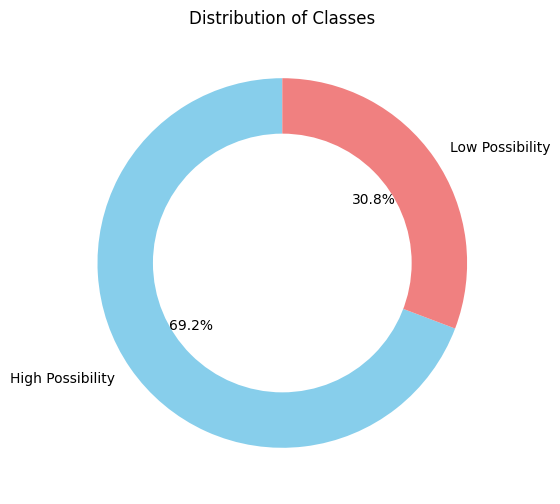

In [28]:
# Count the occurrences of each class
class_counts = df_downsampled['Status'].value_counts()

# Create a donut chart
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white')) # Draw a white circle to create a donut chart
plt.title('Distribution of Classes')
plt.show()

In [29]:
new_df.columns

Index(['Company', 'Total Current Assets', 'Year', 'PPE Total Gross',
       'PPE Total Net', 'Total Current Liabilities', 'SGAE', 'Net Income',
       'Avg Net Trade Cycle (Days)', 'Asset Turnover', 'Gross Profit Margin',
       'Income Aft Tax Margin', 'Cash from Operating Activities', 'Cash',
       'Total Receivables', 'Total Assets', 'Accounts Receivable',
       'Total Inventory', 'Total Long Term Debt', 'Short Term Debt',
       'Total Equity', 'Total Revenue', 'Inventory Turnover',
       'Fixed Asset Turnover', 'WC/Sales, Period-Period Diff', 'Depreciation',
       'Revenue', 'Long Term Investments', 'Intangibles',
       'Net Income After Taxes', 'BVPSTotalEquity', 'Total Debt',
       'Normalized Income After Taxes', 'TRBC Industry Name', 'WC', 'NOC',
       'FIN', 'RSST', 'REC', 'INV', 'SOFTASSETS', 'CASHSALES', 'ROA', 'ISSUE',
       'F-Score', 'Status'],
      dtype='object')

In [30]:
features = ['WC', 'NOC', 'FIN', 'RSST', 'REC', 'INV', 'SOFTASSETS', 'CASHSALES', 'ROA', 'ISSUE']
target = 'Status'

X = df_downsampled[features]
y = df_downsampled[target]

In [31]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to num

In [33]:
def convert_to_numeric(array):
    unique_values = np.unique(array)
    mapping = {value: index for index, value in enumerate(unique_values)}
    return np.array([mapping[value] for value in array])

# Random Forest

In [34]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=2, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=2, random_state=42)

In [35]:
# Predictions on the testing data
y_pred = rf_classifier.predict(X_test_scaled)

Accuracy:  1.0
Recall: 1.0
Precision: 1.0
F1-score: 1.0
Confusion matrix:
   0  1
0  4  0
1  0  2 

Classification report:
                  precision    recall  f1-score   support

High Possibility       1.00      1.00      1.00         4
 Low Possibility       1.00      1.00      1.00         2

        accuracy                           1.00         6
       macro avg       1.00      1.00      1.00         6
    weighted avg       1.00      1.00      1.00         6



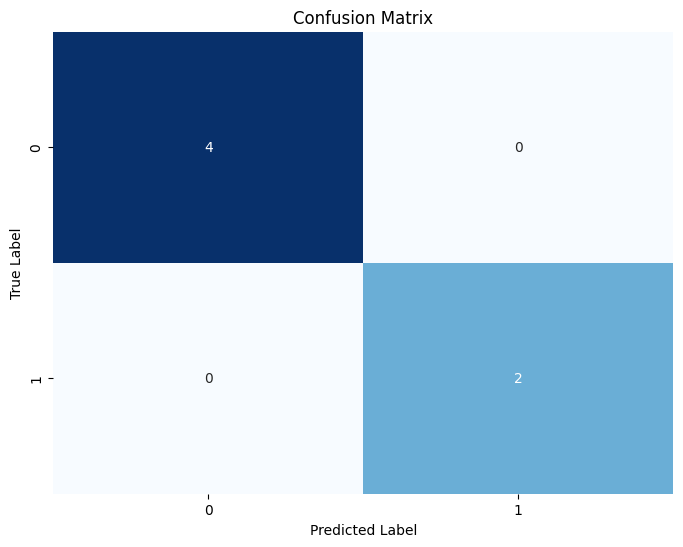

In [36]:
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred, average='macro')  #average type calculates metrics globally by considering all classes ('macro')
recall_rf = recall_score(y_test, y_pred, average='macro') 
f1_rf = f1_score(y_test, y_pred, average='macro') 


print("Accuracy: ", accuracy_rf)
print("Recall:", recall_rf)
print("Precision:", precision_rf)
print("F1-score:", f1_rf)


print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_test,y_pred)),'\n')

print('Classification report:')
print(classification_report(y_test,y_pred))


# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

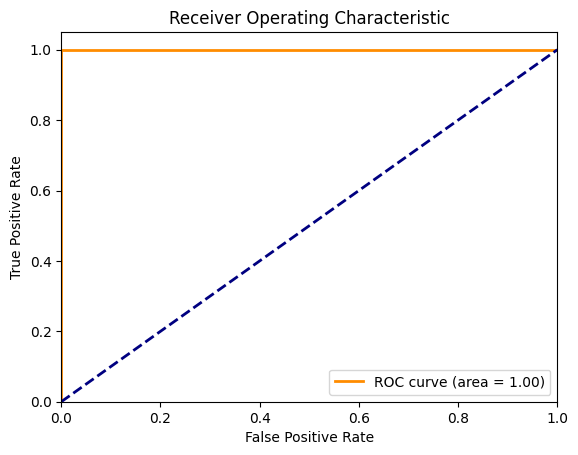

In [37]:
# Encode categorical labels to binary form
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)
y_pred_numeric = convert_to_numeric(y_pred)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_numeric)  
roc_auc = auc(fpr, tpr)

# Plot ROC curve (same as before)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Logistic Regression

In [38]:
# Define the hyperparameters grid
param_grid = {
    'C': [10, 100, 1000, 10000, 100000],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Penalty (L1 or L2 regularization)
}

# Initialize logistic regression model
logistic_model = LogisticRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring='accuracy')


In [39]:
# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

c:\Users\flori\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\flori\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\flori\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\flori\AppDat

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [10, 100, 1000, 10000, 100000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [40]:
# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best estimator found by GridSearchCV
best_logistic_model = grid_search.best_estimator_

# Make predictions on the test data using the best model
y_pred = best_logistic_model.predict(X_test_scaled)

Best Parameters: {'C': 10, 'penalty': 'l2'}


Accuracy:  0.6666666666666666
Recall: 0.625
Precision: 0.625
F1-score: 0.625
Confusion matrix:
   0  1
0  3  1
1  1  1 

Classification report:
                  precision    recall  f1-score   support

High Possibility       0.75      0.75      0.75         4
 Low Possibility       0.50      0.50      0.50         2

        accuracy                           0.67         6
       macro avg       0.62      0.62      0.62         6
    weighted avg       0.67      0.67      0.67         6



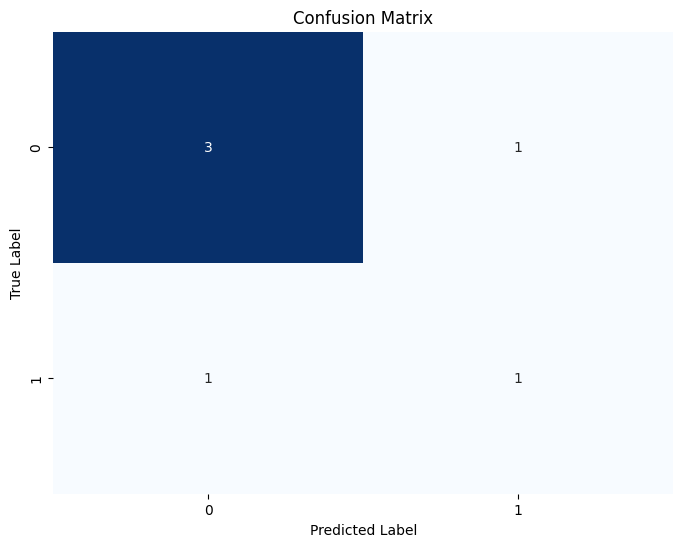

In [41]:
accuracy_lr = accuracy_score(y_test, y_pred)
precision_lr = precision_score(y_test, y_pred, average='macro')  #average type calculates metrics globally by considering all classes ('macro')
recall_lr = recall_score(y_test, y_pred, average='macro') 
f1_lr = f1_score(y_test, y_pred, average='macro') 


print("Accuracy: ", accuracy_lr)
print("Recall:", recall_lr)
print("Precision:", precision_lr)
print("F1-score:", f1_lr)


print('Confusion matrix:')
print(pd.DataFrame(confusion_matrix(y_test,y_pred)),'\n')

print('Classification report:')
print(classification_report(y_test,y_pred))


# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

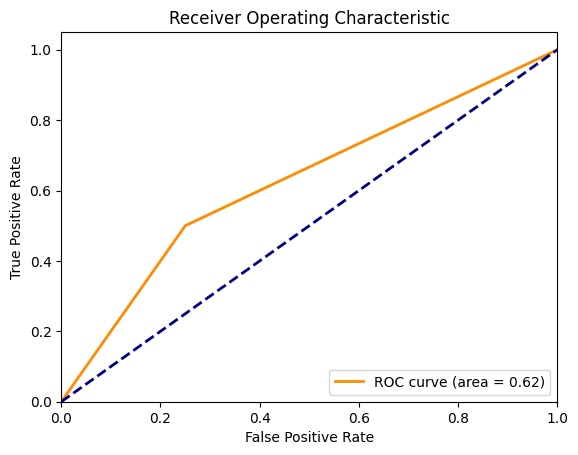

In [42]:
# Encode categorical labels to binary form
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)
y_pred_numeric = convert_to_numeric(y_pred)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_numeric)  
roc_auc = auc(fpr, tpr)

# Plot ROC curve (same as before)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# XGBoost

In [43]:
model = xgb.XGBClassifier(objective='binary:logistic', seed=42,
                          learning_rate=0.01, max_depth=3, n_estimators=5)

In [44]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [45]:
# Train the model
model.fit(X_train, y_train_encoded)
        #   , eval_metric="error", eval_set=[(X_test, y_test_encoded)],
        #   early_stopping_rounds=10, verbose=True)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=5, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [46]:
# Evaluate the model
y_pred_encoded = model.predict(X_test_scaled)

Accuracy: 0.6666666666666666
Precision: 0.0
Recall: 0.0
F1-score: 0.0

Confusion Matrix:
[[4 0]
 [2 0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       0.00      0.00      0.00         2

    accuracy                           0.67         6
   macro avg       0.33      0.50      0.40         6
weighted avg       0.44      0.67      0.53         6



c:\Users\flori\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\flori\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\flori\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

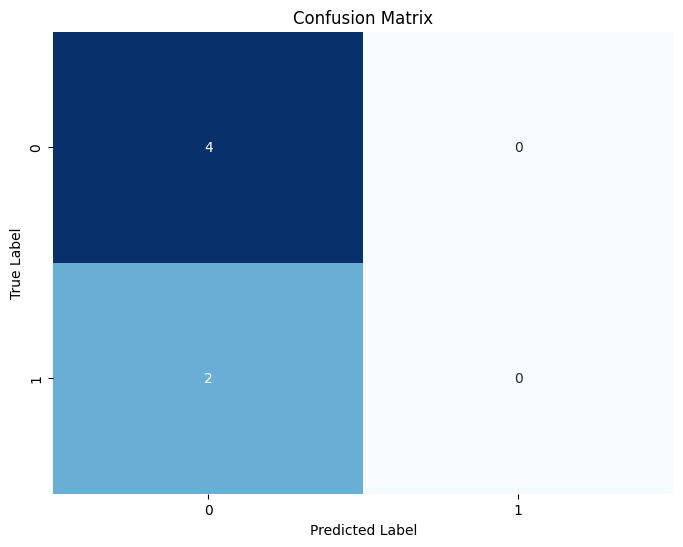

In [47]:
accuracy_xgb = accuracy_score(y_test_encoded, y_pred_encoded)
precision_xgb = precision_score(y_test_encoded, y_pred_encoded)
recall_xgb = recall_score(y_test_encoded, y_pred_encoded)
f1_xgb = f1_score(y_test_encoded, y_pred_encoded)
conf_matrix_xgb = confusion_matrix(y_test_encoded, y_pred_encoded)
class_report_xgb = classification_report(y_test_encoded, y_pred_encoded)

print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1-score:", f1_xgb)
print("\nConfusion Matrix:")
print(conf_matrix_xgb)
print("\nClassification Report:")
print(class_report_xgb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

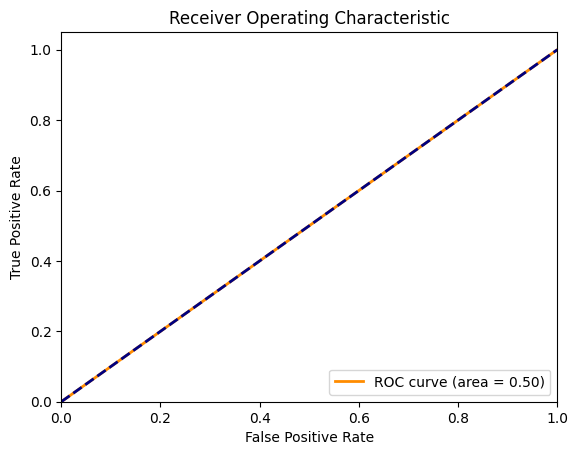

In [48]:
# Encode categorical labels to binary form
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)
y_pred_numeric = convert_to_numeric(y_pred_encoded)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_numeric)  
roc_auc = auc(fpr, tpr)

# Plot ROC curve (same as before)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Naive Baiye Classification

In [49]:
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

GaussianNB()

In [50]:
# Predict the labels for the test data
y_pred = nb_model.predict(X_test_scaled)

In [51]:
# Calculate evaluation metrics
accuracy_nb = accuracy_score(y_test, y_pred)
precision_nb = precision_score(y_test, y_pred, average='macro')
recall_nb = recall_score(y_test, y_pred, average='macro')
f1_nb = f1_score(y_test, y_pred, average='macro')

# Print accuracy, precision, recall, and F1-score
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1-score:", f1_nb)

# Confusion Matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix_nb)

# Classification Report
class_report_nb = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report_nb)

Accuracy: 0.8333333333333334
Precision: 0.8333333333333333
Recall: 0.875
F1-score: 0.8285714285714285

Confusion Matrix:
[[3 1]
 [0 2]]

Classification Report:
                  precision    recall  f1-score   support

High Possibility       1.00      0.75      0.86         4
 Low Possibility       0.67      1.00      0.80         2

        accuracy                           0.83         6
       macro avg       0.83      0.88      0.83         6
    weighted avg       0.89      0.83      0.84         6



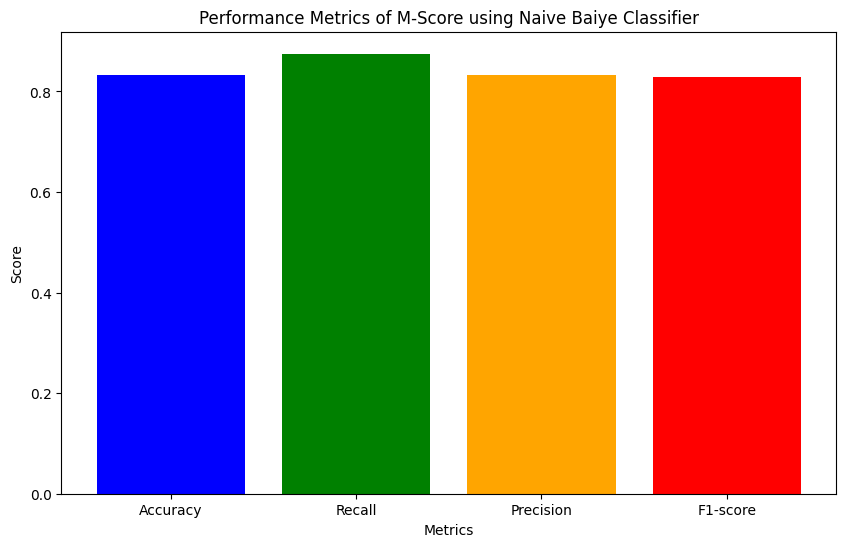

In [52]:
metrics = ['Accuracy', 'Recall', 'Precision', 'F1-score']
values = [accuracy_nb, recall_nb, precision_nb, f1_nb]

# Plotting the bar chart
plt.figure(figsize=(10,6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.title('Performance Metrics of M-Score using Naive Baiye Classifier')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.show()

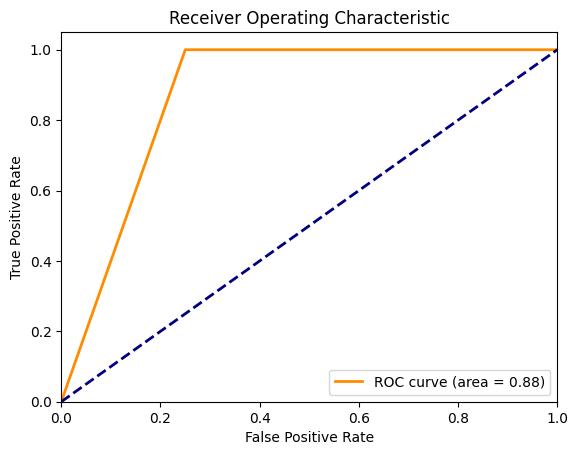

In [53]:
# Encode categorical labels to binary form
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)
y_pred_numeric = convert_to_numeric(y_pred)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_numeric)  
roc_auc = auc(fpr, tpr)

# Plot ROC curve (same as before)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Support Vector Machine (SVM)

In [54]:
# Define a pipeline with StandardScaler and SVM
pipeline = Pipeline([
    # ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear'))
])

# Define the grid of hyperparameters to search
param_grid = {
    'svm__C': [10, 100, 1000, 10000],  # Regularization parameter
    # Other hyperparameters for SVM can be added here
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [55]:
# Use the best model to make predictions
y_pred = best_model.predict(X_test)

In [56]:
# Print the best hyperparameters and performance metrics
print("Best hyperparameters:", best_params)

Best hyperparameters: {'svm__C': 10}


Accuracy: 0.8333333333333334
Precision: 0.8333333333333333
Recall: 0.875
F1-score: 0.8285714285714285

Confusion Matrix:
[[3 1]
 [0 2]]

Classification Report:
                  precision    recall  f1-score   support

High Possibility       1.00      0.75      0.86         4
 Low Possibility       0.67      1.00      0.80         2

        accuracy                           0.83         6
       macro avg       0.83      0.88      0.83         6
    weighted avg       0.89      0.83      0.84         6



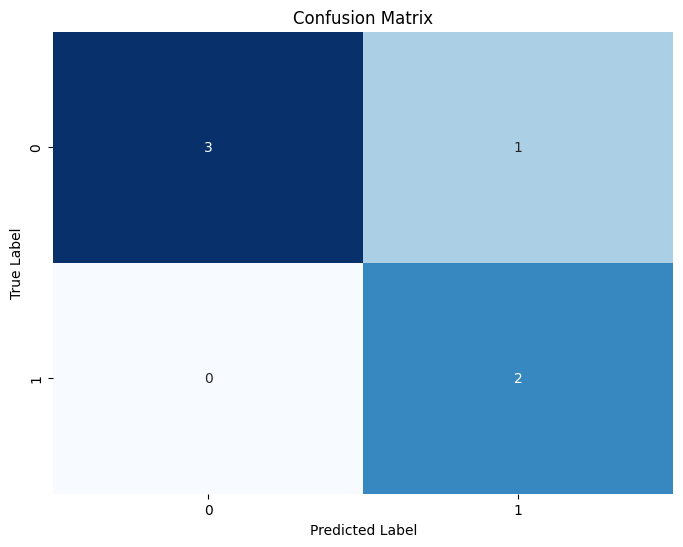

In [57]:
accuracy_svm = accuracy_score(y_test, y_pred)
precision_svm = precision_score(y_test, y_pred, average='macro')
recall_svm = recall_score(y_test, y_pred, average='macro')
f1_svm = f1_score(y_test, y_pred, average='macro')

# Print accuracy, precision, recall, and F1-score
print("Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-score:", f1_svm)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

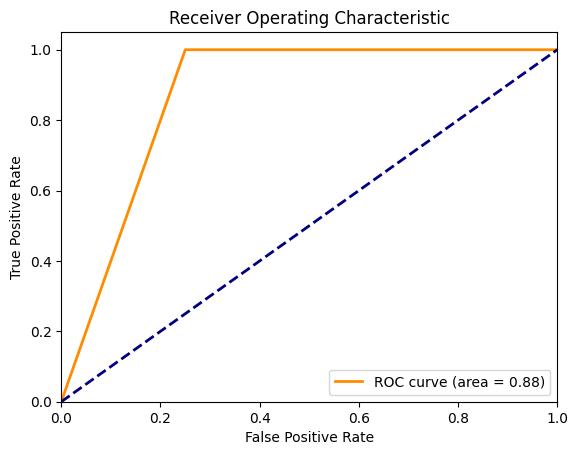

In [58]:
# Encode categorical labels to binary form
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)
y_pred_numeric = convert_to_numeric(y_pred)

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_numeric)  
roc_auc = auc(fpr, tpr)

# Plot ROC curve (same as before)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# MLP

In [59]:
mlp_df = df_downsampled.copy()
mlp_df

,Company,Total Current Assets,Year,PPE Total Gross,PPE Total Net,Total Current Liabilities,SGAE,Net Income,Avg Net Trade Cycle (Days),Asset Turnover,...,FIN,RSST,REC,INV,SOFTASSETS,CASHSALES,ROA,ISSUE,F-Score,Status
0,TNI.HM,829132575190,2021,9216423960,5368493610,437707358530,5274392910,-65310677120,1.416270e+02,1.765277,...,-1.852202e+11,0.082516,0.000000,0.226991,0.979508,1.905793e+12,0.000000,1,3.258906e+11,High Possibility
1,PSD.HN,3343691677080,2022,25087411900,14102752990,2918696410810,227276979060,112526930620,5.651292e+01,2.869853,...,-1.619912e+12,0.114308,0.052161,0.474985,0.967806,8.477681e+12,-0.020745,1,1.449683e+12,High Possibility
2,AGM.HM,849032150340,2022,550835751370,338254972630,649740768540,281626866350,-140476316520,6.214141e+01,1.969502,...,-1.114986e+12,0.084723,-0.152225,0.059768,0.454822,3.721334e+12,-0.108435,1,6.363481e+11,High Possibility
3,ITA.HM,5860848410750,2013,286339433890,222805884510,2155691487910,58760489380,87229973620,1.205011e+05,0.001083,...,1.512798e+12,2.051155,0.075333,0.631413,0.947128,-4.464669e+11,-0.093014,1,-7.634585e+10,Low Possibility
4,SHI.HM,3424719897450,2020,1373287181060,875956589950,2968943904380,411341422100,44059698430,1.762385e+02,1.251485,...,-2.084345e+12,-0.429988,0.076206,0.245896,0.460071,5.033729e+12,-0.006169,1,8.607677e+11,High Possibility
5,HBC.HM,9899968348450,2016,1561285557890,1067092303740,8885588965760,472135927880,567045986810,1.215541e+02,1.148945,...,-2.565272e+11,0.418162,0.117119,0.131142,0.740852,9.668745e+12,0.038248,1,1.653355e+12,High Possibility
6,FPT.HM,16709157051320,2014,5890733574570,3535984457900,12969956085570,3853852548680,1632085087190,7.631836e+01,1.622945,...,-5.941246e+12,-0.102566,0.012850,0.227331,0.492508,3.238619e+13,-0.025784,1,5.538039e+12,High Possibility
7,SMC.HM,2316403364430,2015,681576048060,453193988810,2522856637460,245731225040,-196054039600,4.252209e+01,2.818066,...,7.821573e+09,-0.404121,-0.054406,0.137611,0.598728,1.024043e+13,-0.069684,1,1.751114e+12,High Possibility
8,LDG.HM,5436906744480,2022,2406787370,512983571160,2790822489610,108568478780,4242684980,8.963155e+03,0.025702,...,-1.072577e+12,0.099435,0.032964,0.147095,0.934034,-5.458489e+10,-0.019074,1,-9.334016e+09,Low Possibility
9,AST.HM,350000530320,2022,257325228070,94778922620,115514834230,255639976750,23147273240,5.386372e+01,1.116312,...,2.511563e+10,0.064484,0.000670,0.099104,0.288498,6.032277e+11,0.314106,1,1.031519e+11,High Possibility


In [60]:
mlp_df.columns

Index(['Company', 'Total Current Assets', 'Year', 'PPE Total Gross',
       'PPE Total Net', 'Total Current Liabilities', 'SGAE', 'Net Income',
       'Avg Net Trade Cycle (Days)', 'Asset Turnover', 'Gross Profit Margin',
       'Income Aft Tax Margin', 'Cash from Operating Activities', 'Cash',
       'Total Receivables', 'Total Assets', 'Accounts Receivable',
       'Total Inventory', 'Total Long Term Debt', 'Short Term Debt',
       'Total Equity', 'Total Revenue', 'Inventory Turnover',
       'Fixed Asset Turnover', 'WC/Sales, Period-Period Diff', 'Depreciation',
       'Revenue', 'Long Term Investments', 'Intangibles',
       'Net Income After Taxes', 'BVPSTotalEquity', 'Total Debt',
       'Normalized Income After Taxes', 'TRBC Industry Name', 'WC', 'NOC',
       'FIN', 'RSST', 'REC', 'INV', 'SOFTASSETS', 'CASHSALES', 'ROA', 'ISSUE',
       'F-Score', 'Status'],
      dtype='object')

In [61]:
mlp_df = mlp_df.drop(columns=['Year', 'TRBC Industry Name'])
mlp_df

,Company,Total Current Assets,PPE Total Gross,PPE Total Net,Total Current Liabilities,SGAE,Net Income,Avg Net Trade Cycle (Days),Asset Turnover,Gross Profit Margin,...,FIN,RSST,REC,INV,SOFTASSETS,CASHSALES,ROA,ISSUE,F-Score,Status
0,TNI.HM,829132575190,9216423960,5368493610,437707358530,5274392910,-65310677120,1.416270e+02,1.765277,1.501861,...,-1.852202e+11,0.082516,0.000000,0.226991,0.979508,1.905793e+12,0.000000,1,3.258906e+11,High Possibility
1,PSD.HN,3343691677080,25087411900,14102752990,2918696410810,227276979060,112526930620,5.651292e+01,2.869853,4.874295,...,-1.619912e+12,0.114308,0.052161,0.474985,0.967806,8.477681e+12,-0.020745,1,1.449683e+12,High Possibility
2,AGM.HM,849032150340,550835751370,338254972630,649740768540,281626866350,-140476316520,6.214141e+01,1.969502,5.348008,...,-1.114986e+12,0.084723,-0.152225,0.059768,0.454822,3.721334e+12,-0.108435,1,6.363481e+11,High Possibility
3,ITA.HM,5860848410750,286339433890,222805884510,2155691487910,58760489380,87229973620,1.205011e+05,0.001083,-71.387266,...,1.512798e+12,2.051155,0.075333,0.631413,0.947128,-4.464669e+11,-0.093014,1,-7.634585e+10,Low Possibility
4,SHI.HM,3424719897450,1373287181060,875956589950,2968943904380,411341422100,44059698430,1.762385e+02,1.251485,13.319344,...,-2.084345e+12,-0.429988,0.076206,0.245896,0.460071,5.033729e+12,-0.006169,1,8.607677e+11,High Possibility
5,HBC.HM,9899968348450,1561285557890,1067092303740,8885588965760,472135927880,567045986810,1.215541e+02,1.148945,11.447342,...,-2.565272e+11,0.418162,0.117119,0.131142,0.740852,9.668745e+12,0.038248,1,1.653355e+12,High Possibility
6,FPT.HM,16709157051320,5890733574570,3535984457900,12969956085570,3853852548680,1632085087190,7.631836e+01,1.622945,18.957226,...,-5.941246e+12,-0.102566,0.012850,0.227331,0.492508,3.238619e+13,-0.025784,1,5.538039e+12,High Possibility
7,SMC.HM,2316403364430,681576048060,453193988810,2522856637460,245731225040,-196054039600,4.252209e+01,2.818066,1.440036,...,7.821573e+09,-0.404121,-0.054406,0.137611,0.598728,1.024043e+13,-0.069684,1,1.751114e+12,High Possibility
8,LDG.HM,5436906744480,2406787370,512983571160,2790822489610,108568478780,4242684980,8.963155e+03,0.025702,38.857379,...,-1.072577e+12,0.099435,0.032964,0.147095,0.934034,-5.458489e+10,-0.019074,1,-9.334016e+09,Low Possibility
9,AST.HM,350000530320,257325228070,94778922620,115514834230,255639976750,23147273240,5.386372e+01,1.116312,52.917368,...,2.511563e+10,0.064484,0.000670,0.099104,0.288498,6.032277e+11,0.314106,1,1.031519e+11,High Possibility


In [62]:
from torch.utils.data import TensorDataset, DataLoader

grouped_df = mlp_df.groupby('Company').agg({
    'WC': 'mean',
    'NOC': 'mean',
    'FIN': 'mean',
    'RSST': 'mean',
    'REC': 'mean',
    'INV': 'mean',
    'SOFTASSETS': 'mean',
    'CASHSALES': 'mean',
    'ROA': 'mean',
    'ISSUE': 'mean',
    'F-Score': 'mean',
    'Status': 'first'
}).reset_index()

# Encode the target variable
label_encoder = LabelEncoder()
grouped_df['Status'] = label_encoder.fit_transform(grouped_df['Status'])

# Convert DataFrame to PyTorch tensors
X = grouped_df[['WC', 'NOC','FIN', 'RSST', 'REC', 'INV', 'SOFTASSETS', 'CASHSALES', 'ROA', 'ISSUE']].values.astype(float)
y = grouped_df['Status'].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Set hyperparameters
input_size = X_train.shape[1]
hidden_size = 64
output_size = 2  # Number of classes

# Initialize the model
model = MLP(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Prepare data loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Train the model
num_epochs = 70
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test_tensor).sum().item() / len(y_test_tensor)
    print(f'Accuracy: {accuracy:.4f}')

c:\Users\flori\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch [1/70], Loss: 0.6940
Epoch [2/70], Loss: 0.6843
Epoch [3/70], Loss: 0.6750
Epoch [4/70], Loss: 0.6661
Epoch [5/70], Loss: 0.6575
Epoch [6/70], Loss: 0.6493
Epoch [7/70], Loss: 0.6414
Epoch [8/70], Loss: 0.6338
Epoch [9/70], Loss: 0.6265
Epoch [10/70], Loss: 0.6195
Epoch [11/70], Loss: 0.6127
Epoch [12/70], Loss: 0.6061
Epoch [13/70], Loss: 0.5997
Epoch [14/70], Loss: 0.5935
Epoch [15/70], Loss: 0.5875
Epoch [16/70], Loss: 0.5816
Epoch [17/70], Loss: 0.5758
Epoch [18/70], Loss: 0.5702
Epoch [19/70], Loss: 0.5646
Epoch [20/70], Loss: 0.5592
Epoch [21/70], Loss: 0.5539
Epoch [22/70], Loss: 0.5487
Epoch [23/70], Loss: 0.5435
Epoch [24/70], Loss: 0.5385
Epoch [25/70], Loss: 0.5335
Epoch [26/70], Loss: 0.5286
Epoch [27/70], Loss: 0.5237
Epoch [28/70], Loss: 0.5190
Epoch [29/70], Loss: 0.5143
Epoch [30/70], Loss: 0.5096
Epoch [31/70], Loss: 0.5050
Epoch [32/70], Loss: 0.5004
Epoch [33/70], Loss: 0.4959
Epoch [34/70], Loss: 0.4914
Epoch [35/70], Loss: 0.4870
Epoch [36/70], Loss: 0.4825
E

Accuracy: 0.8000
Precision: 1.0000
Recall: 0.5000
F1 Score: 0.6667
Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.50      0.67         2

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



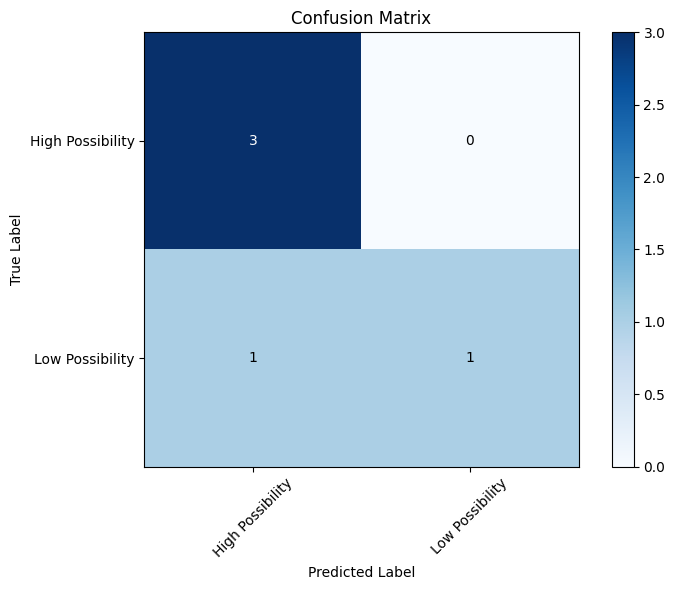

In [63]:
# Convert predictions to numpy arrays
y_pred = predicted.numpy()
y_true = y_test_tensor.numpy()

# Calculate metrics
accuracy_mlp = accuracy_score(y_true, y_pred)
precision_mlp = precision_score(y_true, y_pred)
recall_mlp = recall_score(y_true, y_pred)
f1_mlp = f1_score(y_true, y_pred)
classification_rep = classification_report(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(label_encoder.classes_))
plt.xticks(tick_marks, label_encoder.classes_, rotation=45)
plt.yticks(tick_marks, label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()

# Print metrics
print(f'Accuracy: {accuracy_mlp:.4f}')
print(f'Precision: {precision_mlp:.4f}')
print(f'Recall: {recall_mlp:.4f}')
print(f'F1 Score: {f1_mlp:.4f}')
print('Classification Report:')
print(classification_rep)

plt.show()

# 6 models comparison

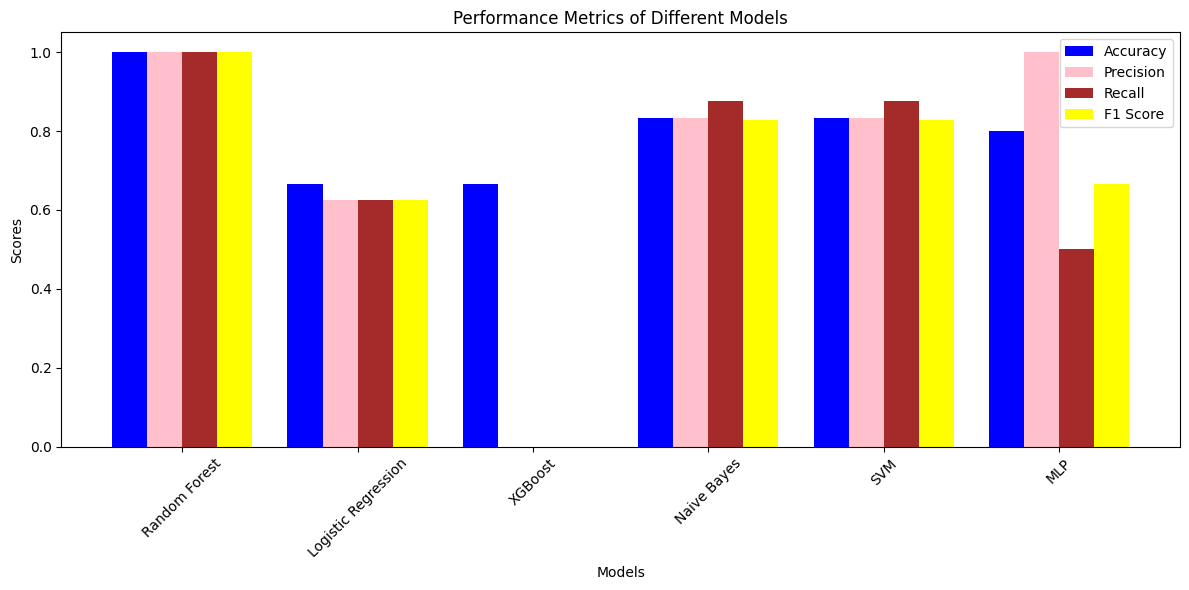

In [64]:
# Metrics for each model
models = ['Random Forest', 'Logistic Regression', 'XGBoost', 'Naive Bayes', 'SVM', 'MLP']

# Sample metrics (replace these with your actual metrics)
accuracy = [accuracy_rf, accuracy_lr, accuracy_xgb, accuracy_nb, accuracy_svm, accuracy_mlp]
precision = [precision_rf, precision_lr, precision_xgb, precision_nb, precision_svm, precision_mlp]
recall = [recall_rf, recall_lr, recall_xgb, recall_nb, recall_svm, recall_mlp]
f1_score = [f1_rf, f1_lr, f1_xgb, f1_nb, f1_svm, f1_mlp]

# Plotting the bar chart
x = range(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(x, accuracy, width, label='Accuracy', color = 'blue')
bar2 = ax.bar([i + width for i in x], precision, width, label='Precision', color = 'pink')
bar3 = ax.bar([i + 2*width for i in x], recall, width, label='Recall', color = 'brown')
bar4 = ax.bar([i + 3*width for i in x], f1_score, width, label='F1 Score', color = 'yellow')


# Adding labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics of Different Models')
ax.set_xticks([i + 1.5 * width for i in x])
ax.set_xticklabels(models)
ax.legend()

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
